In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
import pickle as pk

In [3]:
df = pd.read_excel("premiums.xlsx")
df.head(3)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164


In [4]:
df.shape

(50000, 13)

In [5]:
df.isnull().sum()

Age                       0
Gender                    0
Region                    0
Marital_status            0
Number Of Dependants      0
BMI_Category              0
Smoking_Status           11
Employment_Status         2
Income_Level             13
Income_Lakhs              0
Medical History           0
Insurance_Plan            0
Annual_Premium_Amount     0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.isnull().sum().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49976 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    49976 non-null  int64 
 1   Gender                 49976 non-null  object
 2   Region                 49976 non-null  object
 3   Marital_status         49976 non-null  object
 4   Number Of Dependants   49976 non-null  int64 
 5   BMI_Category           49976 non-null  object
 6   Smoking_Status         49976 non-null  object
 7   Employment_Status      49976 non-null  object
 8   Income_Level           49976 non-null  object
 9   Income_Lakhs           49976 non-null  int64 
 10  Medical History        49976 non-null  object
 11  Insurance_Plan         49976 non-null  object
 12  Annual_Premium_Amount  49976 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.3+ MB


In [9]:
df['Age'].unique()

array([ 26,  29,  49,  30,  18,  56,  33,  43,  59,  22,  21,  46,  68,
        60,  27,  25,  36,  20,  28,  32,  19,  55,  35,  52,  40,  23,
        50,  41,  67,  37,  24,  34,  54,  42,  45,  44,  57,  38,  31,
        58,  48,  51, 224,  47,  39,  53,  66,  64,  65,  62,  61,  70,
        72,  69,  71, 124,  63, 136, 203, 356], dtype=int64)

In [10]:
df['Age'].describe()

count    49976.000000
mean        34.591764
std         15.000378
min         18.000000
25%         22.000000
50%         31.000000
75%         45.000000
max        356.000000
Name: Age, dtype: float64

<Axes: ylabel='Age'>

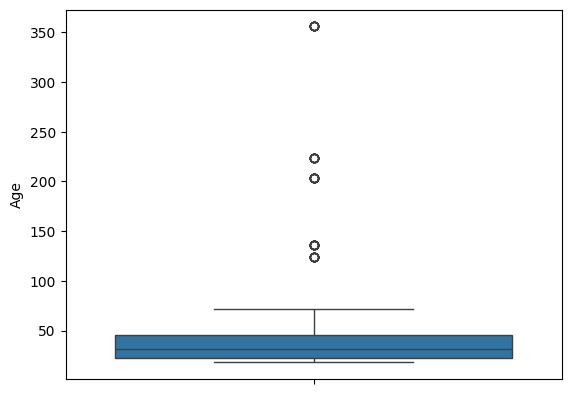

In [11]:
sns.boxplot(df['Age'])

In [12]:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
print("q1",q1)
print("q3",q3)
iqr = q3 - q1
print("iqr",iqr)

q1 22.0
q3 45.0
iqr 23.0


In [13]:
upper_limit = q3 + 1.5 * iqr
lower_limit = q3 - 1.5 * iqr
print("upper limit", upper_limit)
print("lower limit", lower_limit)

upper limit 79.5
lower limit 10.5


<Axes: ylabel='Age'>

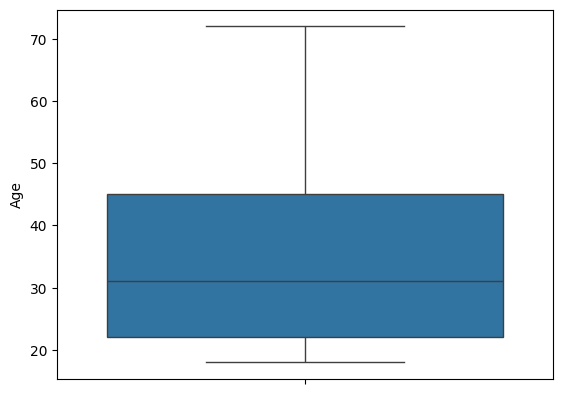

In [14]:
df = df[(df['Age'] >= lower_limit) & (df['Age'] <= upper_limit)]
sns.boxplot(df['Age'])

In [15]:
df['Age'].unique()

array([26, 29, 49, 30, 18, 56, 33, 43, 59, 22, 21, 46, 68, 60, 27, 25, 36,
       20, 28, 32, 19, 55, 35, 52, 40, 23, 50, 41, 67, 37, 24, 34, 54, 42,
       45, 44, 57, 38, 31, 58, 48, 51, 47, 39, 53, 66, 64, 65, 62, 61, 70,
       72, 69, 71, 63], dtype=int64)

In [16]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [17]:
df['Region'].unique()

array(['Northwest', 'Southeast', 'Northeast', 'Southwest'], dtype=object)

In [18]:
df['Marital_status'].unique()

array(['Unmarried', 'Married'], dtype=object)

In [19]:
df['Number Of Dependants'].unique()

array([ 0,  2,  3,  4,  1,  5, -3, -1], dtype=int64)

In [20]:
df['Number Of Dependants'] = df['Number Of Dependants'].apply(lambda x : 0 if x < 0 else x)
df['Number Of Dependants'].unique()

array([0, 2, 3, 4, 1, 5], dtype=int64)

In [21]:
df['BMI_Category'].unique()

array(['Normal', 'Obesity', 'Overweight', 'Underweight'], dtype=object)

In [22]:
df['Smoking_Status'].unique()

array(['No Smoking', 'Regular', 'Occasional', 'Smoking=0',
       'Does Not Smoke', 'Not Smoking'], dtype=object)

In [23]:
df['Smoking_Status'] = df['Smoking_Status'].replace({'No Smoking': 'Non-smoker',
                                                        'Does Not Smoke': 'Non-smoker',
                                                        'Not Smoking': 'Non-smoker',
                                                        'Smoking=0': 'Non-smoker'})

In [24]:
df['Smoking_Status'].unique()

array(['Non-smoker', 'Regular', 'Occasional'], dtype=object)

In [25]:
df['Employment_Status'].unique()

array(['Salaried', 'Self-Employed', 'Freelancer'], dtype=object)

In [26]:
df['Income_Level'].unique()

array(['<10L', '10L - 25L', '> 40L', '25L - 40L'], dtype=object)

In [27]:
df['Income_Level'] = df['Income_Level'].replace({'<10L': 500000,       
                                                    '10L - 25L': 1750000,
                                                    '25L - 40L': 3250000,
                                                    '> 40L': 4500000})
df['Income_Level'].unique()

C:\Users\DELL\AppData\Local\Temp\ipykernel_18004\3987511121.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Income_Level'] = df['Income_Level'].replace({'<10L': 500000,


array([ 500000, 1750000, 4500000, 3250000], dtype=int64)

In [28]:
df['Income_Lakhs'].unique()

array([  6,  20,  77,  99,  14,   4,  46,  21,   3,  97,   1,  27,  15,
        18,   7,  37,  30,  13,   8,  83,  19,  29,   5,  70,  11,  33,
        23,  40,  84,  22,   9,  71,  59,  38,  35,  28,  39,  57,  25,
        12,  36,  92,   2,  24,  16,  34,  93,  78,  49,  68,  52,  62,
        31,  90,  50,  32,  26,  10,  88,  54,  86,  41,  95,  64,  85,
        81,  79,  56,  80,  17,  98,  89,  82, 100,  44,  66,  53,  75,
        94,  69,  58,  74,  65,  91,  42,  61,  87,  96,  51,  67,  43,
        73,  63,  55,  48,  45,  47,  72,  60, 560,  76, 440, 630, 900,
       930, 580, 700, 790, 770, 680], dtype=int64)

<Axes: ylabel='Income_Lakhs'>

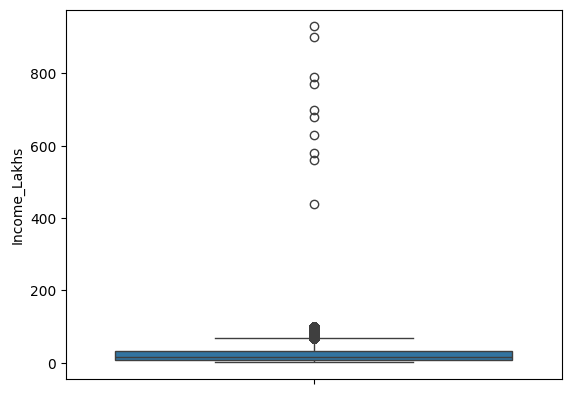

In [29]:
sns.boxplot(df['Income_Lakhs'])

q1 7.0
q3 31.0
24.0
43.0
-5.0


<Axes: ylabel='Income_Lakhs'>

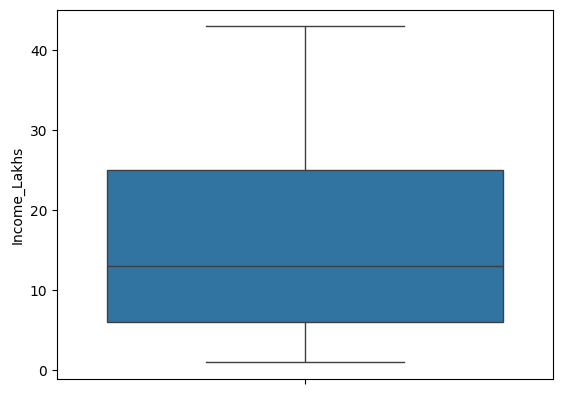

In [30]:
q1 = df['Income_Lakhs'].quantile(0.25)
q3 = df['Income_Lakhs'].quantile(0.75)
print("q1", q1)
print("q3", q3)

iqr = q3 - q1
print(iqr)

upper_limit = q1 + 1.5*iqr
lower_limit = q3 - 1.5*iqr
print(upper_limit)
print(lower_limit)

df = df[(df['Income_Lakhs'] >= lower_limit) & (df['Income_Lakhs'] <= upper_limit)]
sns.boxplot(df['Income_Lakhs'])

In [31]:
df['Income_Lakhs'].unique()

array([ 6, 20, 14,  4, 21,  3,  1, 27, 15, 18,  7, 37, 30, 13,  8, 19, 29,
        5, 11, 33, 23, 40, 22,  9, 38, 35, 28, 39, 25, 12, 36,  2, 24, 16,
       34, 31, 32, 26, 10, 41, 17, 42, 43], dtype=int64)

In [32]:
df.columns

Index(['Age', 'Gender', 'Region', 'Marital_status', 'Number Of Dependants',
       'BMI_Category', 'Smoking_Status', 'Employment_Status', 'Income_Level',
       'Income_Lakhs', 'Medical History', 'Insurance_Plan',
       'Annual_Premium_Amount'],
      dtype='object')

In [33]:
df['Medical History'].unique()

array(['Diabetes', 'High blood pressure',
       'Diabetes & High blood pressure', 'No Disease', 'Thyroid',
       'Heart disease', 'High blood pressure & Heart disease',
       'Diabetes & Thyroid', 'Diabetes & Heart disease'], dtype=object)

<Axes: ylabel='Medical History'>

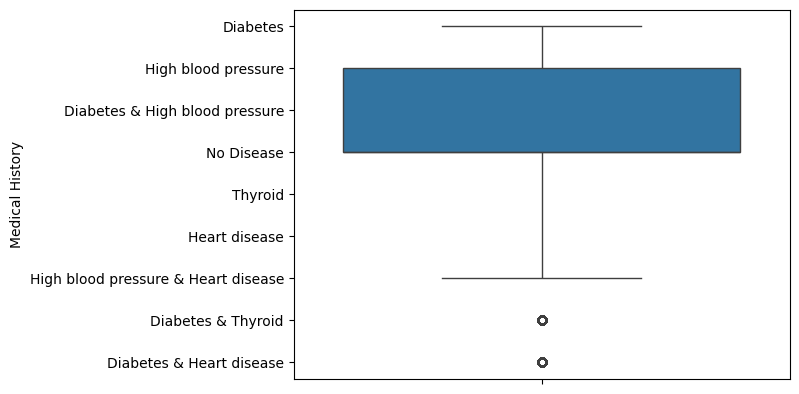

In [34]:
sns.boxplot(df['Medical History'])

In [35]:
df['Insurance_Plan'].unique()

array(['Bronze', 'Silver', 'Gold'], dtype=object)

In [36]:
df['Annual_Premium_Amount'].unique()

array([ 9053, 16339, 18164, ..., 18313, 26370, 10957], dtype=int64)

<Axes: ylabel='Annual_Premium_Amount'>

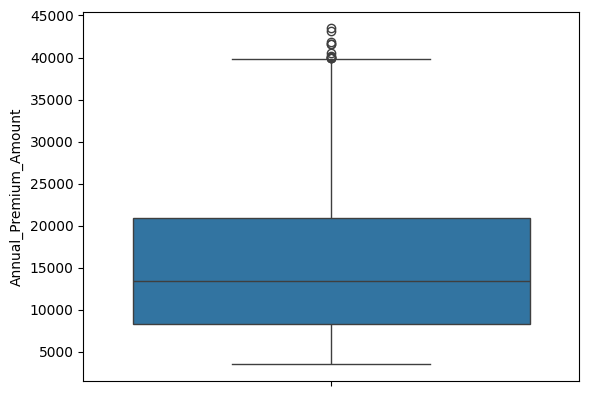

In [37]:
sns.boxplot(df['Annual_Premium_Amount'])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43718 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    43718 non-null  int64 
 1   Gender                 43718 non-null  object
 2   Region                 43718 non-null  object
 3   Marital_status         43718 non-null  object
 4   Number Of Dependants   43718 non-null  int64 
 5   BMI_Category           43718 non-null  object
 6   Smoking_Status         43718 non-null  object
 7   Employment_Status      43718 non-null  object
 8   Income_Level           43718 non-null  int64 
 9   Income_Lakhs           43718 non-null  int64 
 10  Medical History        43718 non-null  object
 11  Insurance_Plan         43718 non-null  object
 12  Annual_Premium_Amount  43718 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 4.7+ MB


In [39]:
cat_cols = df.select_dtypes("object").columns
cat_cols

Index(['Gender', 'Region', 'Marital_status', 'BMI_Category', 'Smoking_Status',
       'Employment_Status', 'Medical History', 'Insurance_Plan'],
      dtype='object')

In [40]:
encoders = {}
for cols in cat_cols:
    le = LabelEncoder()
    df[cols] = le.fit_transform(df[cols])
    encoders[cols] = le
df.head(3)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,1,1,1,0,0,0,1,500000,6,0,0,9053
1,29,0,2,0,2,1,2,1,500000,6,0,0,16339
2,49,0,0,0,2,0,0,2,1750000,20,5,2,18164


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43718 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Age                    43718 non-null  int64
 1   Gender                 43718 non-null  int32
 2   Region                 43718 non-null  int32
 3   Marital_status         43718 non-null  int32
 4   Number Of Dependants   43718 non-null  int64
 5   BMI_Category           43718 non-null  int32
 6   Smoking_Status         43718 non-null  int32
 7   Employment_Status      43718 non-null  int32
 8   Income_Level           43718 non-null  int64
 9   Income_Lakhs           43718 non-null  int64
 10  Medical History        43718 non-null  int32
 11  Insurance_Plan         43718 non-null  int32
 12  Annual_Premium_Amount  43718 non-null  int64
dtypes: int32(8), int64(5)
memory usage: 3.3 MB


In [42]:
x = df.drop(columns=['Annual_Premium_Amount'], axis = 1)
y = df['Annual_Premium_Amount']

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [44]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((34974, 12), (8744, 12), (34974,), (8744,))

In [45]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_train

array([[-0.6841353 , -1.10116486,  1.16556845, ..., -0.33738334,
         0.71583462, -0.9509626 ],
       [-0.83071911,  0.90812923,  0.19252718, ...,  1.96186261,
         0.71583462, -0.9509626 ],
       [-0.17109198, -1.10116486, -0.78051409, ..., -0.59285512,
         0.71583462, -0.9509626 ],
       ...,
       [ 1.7344975 ,  0.90812923, -1.75355536, ..., -0.76316963,
         0.71583462,  0.16852866],
       [ 0.04878373, -1.10116486,  0.19252718, ..., -0.93348415,
        -1.75800397, -0.9509626 ],
       [ 0.48853515,  0.90812923,  1.16556845, ..., -0.50769786,
         0.71583462,  1.28801993]])

In [46]:
x_test = scaler.transform(x_test)
x_test

array([[-0.97730291,  0.90812923,  1.16556845, ...,  0.1735602 ,
         0.71583462, -0.9509626 ],
       [-0.39096769,  0.90812923,  1.16556845, ...,  0.25871746,
         1.06924013,  1.28801993],
       [-0.83071911, -1.10116486,  1.16556845, ..., -0.67801238,
        -0.34438192, -0.9509626 ],
       ...,
       [ 0.26865944, -1.10116486,  1.16556845, ..., -0.84832689,
         1.06924013, -0.9509626 ],
       [-1.19717862, -1.10116486,  0.19252718, ..., -1.01864141,
         0.71583462, -0.9509626 ],
       [-0.6108434 ,  0.90812923,  0.19252718, ...,  1.19544729,
        -1.75800397,  1.28801993]])

In [47]:
linear_model = LinearRegression()

In [48]:
linear_model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [49]:
y_pred_test = linear_model.predict(x_test)
y_pred_test

array([ 7088.09655834, 18322.6214562 ,  6206.59194862, ...,
       11782.29527092,  4224.27266975, 20081.19572506])

In [50]:
from sklearn.metrics import r2_score

In [51]:
score = r2_score(y_test, y_pred_test)
score

0.7383803046597139

In [54]:
r1 = Ridge(alpha=2)
r1.fit(x_train, y_train)
r1.score(x_test,y_test)

0.738380092204586

In [55]:
r2 = Ridge(alpha=3)
r2.fit(x_train, y_train)
r2.score(x_test, y_test)

0.7383799839235969

In [56]:
l1 = Lasso(alpha = 4)
l1.fit(x_train, y_train)
l1.score(x_test, y_test)

0.7384265646722739

In [57]:
l2 = Lasso(alpha = 6)
l2.fit(x_train, y_train)
l2.score(x_test, y_test)

0.73842863019838

In [58]:
poly = PolynomialFeatures(degree = 2)
x_train_poly = poly.fit_transform(x_train)
x_train_poly

array([[ 1.        , -0.6841353 , -1.10116486, ...,  0.5124192 ,
        -0.68073195,  0.90432986],
       [ 1.        , -0.83071911,  0.90812923, ...,  0.5124192 ,
        -0.68073195,  0.90432986],
       [ 1.        , -0.17109198, -1.10116486, ...,  0.5124192 ,
        -0.68073195,  0.90432986],
       ...,
       [ 1.        ,  1.7344975 ,  0.90812923, ...,  0.5124192 ,
         0.12063865,  0.02840191],
       [ 1.        ,  0.04878373, -1.10116486, ...,  3.09057797,
         1.67179603,  0.90432986],
       [ 1.        ,  0.48853515,  0.90812923, ...,  0.5124192 ,
         0.92200925,  1.65899533]])

In [59]:
x_test_poly = poly.transform(x_test)
x_test_poly

array([[ 1.        , -0.97730291,  0.90812923, ...,  0.5124192 ,
        -0.68073195,  0.90432986],
       [ 1.        , -0.39096769,  0.90812923, ...,  1.14327446,
         1.3772026 ,  1.65899533],
       [ 1.        , -0.83071911, -1.10116486, ...,  0.11859891,
         0.32749433,  0.90432986],
       ...,
       [ 1.        ,  0.26865944, -1.10116486, ...,  1.14327446,
        -1.01680737,  0.90432986],
       [ 1.        , -1.19717862, -1.10116486, ...,  0.5124192 ,
        -0.68073195,  0.90432986],
       [ 1.        , -0.6108434 ,  0.90812923, ...,  3.09057797,
        -2.26434415,  1.65899533]])

In [60]:
poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [61]:
y_pred_poly = poly_model.predict(x_test_poly)
y_pred_poly

array([ 5414.17490352, 15698.53065602,  8070.2923134 , ...,
       10812.10196983,  7404.37205171, 19916.13722376])

In [62]:
score2 = r2_score(y_test, y_pred_poly)
score2

0.9269821217801594

In [63]:
dt_model = DecisionTreeRegressor()

In [64]:
dt_model.fit(x_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [65]:
y_pred_dt = dt_model.predict(x_test)
y_pred_dt

array([ 7975., 19004.,  5438., ..., 10997., 10160., 22175.])

In [66]:
score = r2_score(y_test, y_pred_dt)
score

0.9604594390761855

In [67]:
df.iloc[0].values

array([    26,      1,      1,      1,      0,      0,      0,      1,
       500000,      6,      0,      0,   9053], dtype=int64)

In [68]:
df.columns

Index(['Age', 'Gender', 'Region', 'Marital_status', 'Number Of Dependants',
       'BMI_Category', 'Smoking_Status', 'Employment_Status', 'Income_Level',
       'Income_Lakhs', 'Medical History', 'Insurance_Plan',
       'Annual_Premium_Amount'],
      dtype='object')

In [69]:
pred_data = pd.DataFrame([[26, 1, 1, 1, 0, 0, 0, 1, 500000, 6, 0, 0]],
                            columns=['Age', 'Gender', 'Region', 'Marital_status', 'Number Of Dependants',
                                        'BMI_Category', 'Smoking_Status', 'Employment_Status', 'Income_Level',
                                        'Income_Lakhs', 'Medical History', 'Insurance_Plan'])
pred_data

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan
0,26,1,1,1,0,0,0,1,500000,6,0,0


In [70]:
scaler.transform(pred_data)

array([[-0.6108434 ,  0.90812923, -0.78051409,  0.96897201, -1.14622665,
        -0.93006526, -0.85332181,  0.06005309, -0.98141849, -0.84832689,
        -1.75800397, -0.9509626 ]])

In [71]:
dt_model.predict(pred_data)

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


array([36799.])

In [72]:
pk.dump(dt_model,open("dt_model.pkl","wb"))
pk.dump(scaler,open("scaler.pkl","wb"))
pk.dump(encoders,open("encoders.pkl","wb"))